# 주제 : 서울시 구별 CCTV 현황 분석

### 부제 : 우리동네 CCTV는 충분한가?


### 자료 출처

- CCTV : https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
- 인구 : https://data.seoul.go.kr/dataList/10730/S/2/datasetView.do

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. Data Definition

## 1) CCTV Load

In [10]:
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 2) Population Load

- 엑셀 파일 로드
    pd.read_excel("data/seoul/Report.xls")
    - usecols="B, D, G, J, N" : 필요한 컬럼만 가져오기
    - header=2 : 위에 필요없는 줄 건너띄고 가져오기

In [11]:
pop_seoul = pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N", header=2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 3) EDA & Preprocessing

### (1) 컬럼 이름 변경

- CCTV 자료에서 "기관명"이라는 컬럼을 "구별"로 변경

In [12]:
cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True)  # 특정 컬럼만 골라서 이름 변경 가능
# cctv_seoul.columns=["구별", "소계", "2013년도 이전", "2014년", "2015년", "2016년"]  # 모든 컬럼명을 다 작성해야해서 불편
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 인구 자료에서 컬럼명을 각각 "구별", "인구수", "한국인", "외국인", "고령자"로 변경

In [13]:
pop_seoul.columns=["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### (2) CCTV 현황 탐색

- 어느 구가 가장 많이 설치되어 있나, 또는 적게 설치되어 있나

In [20]:
print(cctv_seoul["구별"][cctv_seoul["소계"]==cctv_seoul["소계"].max()])
print(cctv_seoul["구별"][cctv_seoul["소계"]==cctv_seoul["소계"].min()])

0    강남구
Name: 구별, dtype: object
9    도봉구
Name: 구별, dtype: object


In [23]:
cctv_seoul.sort_values(by="소계", ascending=False)[["구별", "소계"]]

,구별,소계
0,강남구,3238
18,양천구,2482
14,서초구,2297
4,관악구,2109
21,은평구,2108
20,용산구,2096
6,구로구,1884
10,동대문구,1870
16,성북구,1651
22,종로구,1619


### (3) "최근 증가율"이라는 파생변수 추가

- (2014 + 2015 + 2016) / 2013년도 이전 * 100
- CCTV 설치 증가율에 따라 가장 높은 구와 가장 적은 구를 탐색(각각 3개씩)

In [25]:
cctv_seoul["최근 증가율"] = (cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"])/cctv_seoul["2013년도 이전"]*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [38]:
print("<<CCTV 설치 증가율 가장 적은 구>>")
print(cctv_seoul.sort_values(by="최근 증가율").head(3))
print("---------------------------------------------------------------------------")
print("<<CCTV 설치 증가율 가장 높은 구>>")
print(cctv_seoul.sort_values(by="최근 증가율", ascending=False)[:][0:3])

<<CCTV 설치 증가율 가장 적은 구>>
      구별    소계  2013년도 이전  2014년  2015년  2016년     최근 증가율
18   양천구  2482       1843    142     30    467  34.671731
13  서대문구  1254        844     50     68    292  48.578199
20   용산구  2096       1368    218    112    398  53.216374
---------------------------------------------------------------------------
<<CCTV 설치 증가율 가장 높은 구>>
     구별    소계  2013년도 이전  2014년  2015년  2016년      최근 증가율
22  종로구  1619        464    314    211    630  248.922414
9   도봉구   825        238    159     42    386  246.638655
12  마포구   980        314    118    169    379  212.101911


### (4) CCTV Data 중간 Checkpoint

- 작업을 끊었다 할 경우 처음부터 다시 실행하지 않고 이 부분부터 실행하면 됨!

In [39]:
cctv_seoul.to_csv("data/seoul/cctv_seoul.csv", encoding="utf-8")



-----



In [41]:
cctv_seoul = pd.read_csv("data/seoul/cctv_seoul.csv")
del cctv_seoul["Unnamed: 0"]
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780
5,광진구,878,573,78,53,174,53.228621
6,구로구,1884,1142,173,246,323,64.973730
7,금천구,1348,674,51,269,354,100.000000
8,노원구,1566,542,57,451,516,188.929889
9,도봉구,825,238,159,42,386,246.638655


### (5) 인구데이터에서 전처리

In [44]:
#### 필요없는 행 삭제(여기선 첫번째 행) : drop()->행 지울 때 편리, del->컬럼 지울 때 편리 ####
pop_seoul.drop([0], inplace=True)

In [46]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [51]:
#### 구별데이터의 중복이나 결측치 등을 확인 ####

# 결측치 확인
pop_seoul.info()
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()]

# 중복값 확인
pop_seoul["구별"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


종로구     1
마포구     1
송파구     1
강남구     1
서초구     1
관악구     1
동작구     1
영등포구    1
금천구     1
구로구     1
강서구     1
양천구     1
서대문구    1
중구      1
은평구     1
노원구     1
도봉구     1
강북구     1
성북구     1
중랑구     1
동대문구    1
광진구     1
성동구     1
용산구     1
강동구     1
Name: 구별, dtype: int64

In [52]:
# 결측치 삭에
pop_seoul.drop([26], inplace=True)

### (6) 인구데이터 현황

In [58]:
#### 구별로 인구수 탐색(전체, 외국인, 고령자) ####

print("<<인구수 많은 구>>")
print(pop_seoul.sort_values("인구수", ascending=False).head(3))
print("<<인구수 적은 구>>")
print(pop_seoul.sort_values("인구수").head(3))
print("----------------------------------------------------")
print("<<외국인 수 많은 구>>")
print(pop_seoul.sort_values("외국인", ascending=False).head(3))
print("<<외국인 수 적은 구>>")
print(pop_seoul.sort_values("외국인").head(3))
print("----------------------------------------------------")
print("<<고령자 수 많은 구>>")
print(pop_seoul.sort_values("고령자", ascending=False).head(3))
print("<<고령자 수 적은 구>>")
print(pop_seoul.sort_values("고령자").head(3))

<<인구수 많은 구>>
     구별     인구수     한국인   외국인    고령자
24  송파구  671994  665282  6712  77978
16  강서구  608361  601696  6665  77381
23  강남구  557865  552976  4889  65859
<<인구수 적은 구>>
    구별     인구수     한국인    외국인    고령자
2   중구  135139  126082   9057  21655
1  종로구  164348  154549   9799  26429
3  용산구  245411  229909  15502  37238
----------------------------------------------------
<<외국인 수 많은 구>>
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
<<외국인 수 적은 구>>
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
----------------------------------------------------
<<고령자 수 많은 구>>
     구별     인구수     한국인   외국인    고령자
24  송파구  671994  665282  6712  77978
16  강서구  608361  601696  6665  77381
12  은평구  490253  485902  4351  75535
<<고령자 수 적은 구>>
     구별     인구수     한국인    외국인    고령자
2    중구  135139  12608

In [59]:
#### 전체 인구 대비 외국인비율, 고령자비율 파생변수 추가해서 순위 확인 ####

pop_seoul["외국인비율"] = pop_seoul["외국인"]/pop_seoul["인구수"]*100
pop_seoul["고령자비율"] = pop_seoul["고령자"]/pop_seoul["인구수"]*100

In [60]:
print("<<외국인비율 높은 구>>")
print(pop_seoul.sort_values("외국인비율", ascending=False).head(3))
print("<<외국인비율 낮은 구>>")
print(pop_seoul.sort_values("외국인비율").head(3))
print("----------------------------------------------------")
print("<<고령자비율 높은 구>>")
print(pop_seoul.sort_values("고령자비율", ascending=False).head(3))
print("<<고령자비율 낮은 구>>")
print(pop_seoul.sort_values("고령자비율").head(3))

<<외국인비율 높은 구>>
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
<<외국인비율 낮은 구>>
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
----------------------------------------------------
<<고령자비율 높은 구>>
    구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
9  강북구  327511  323862  3649  57002  1.114161  17.404606
1  종로구  164348  154549  9799  26429  5.962348  16.081121
2   중구  135139  126082  9057  21655  6.701988  16.024242
<<고령자비율 낮은 구>>
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
24  송파구  671994  665282  6712  77978  0.998818  11.603973
23  강남구  557865  552976  4889  65859  0.876377  11.805544
15  양천구  4730

## 4) Final Analysis

### (1) 인구 대비 CCTV 설치 현황

In [63]:
#### CCTV 데이터와 인구 데이터 병합 ####

data_result = pd.merge(pop_seoul, cctv_seoul, how='inner', on="구별")
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [64]:
#### 필요없는 컬럼 삭제 ####

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [65]:
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [70]:
#### 구별 컬럼을 인덱스로 변경 ####

data_result.set_index("구별", inplace=True)

In [72]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


// 관계 비교 -> 어떤 변수가 CCTV수랑 관계가 가장 깊을까? //
- CCTV 개수(소계)와 인구 데이터의 3가지 변수(인구수, 고령자, 외국인)가 관계가 있는지 확인
- 상관계수 : np.corrcoef()
    - ~ +-0.2 : 아주 약한 관계
    - +-0.3 ~ +-0.6 : 강한 관계
    - +-0.7 ~ : 매우 강한 관계

In [74]:
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))  # 0에 가까움 -> 연관없어 보임
print("---------------------------------------")
print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))  # 음의 관계
print("---------------------------------------")
print(np.corrcoef(data_result["인구수"], data_result["소계"]))      # 양의 관계

# 고령자비율의 상관계수가 가장 크지만 논리적으로 납득이 잘 안되므로
# 큰 차이 없는 인구수가 관계가 CCTV수와 관계가 있다고 추출한다.

[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
---------------------------------------
[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
---------------------------------------
[[1.         0.23037183]
 [0.23037183 1.        ]]


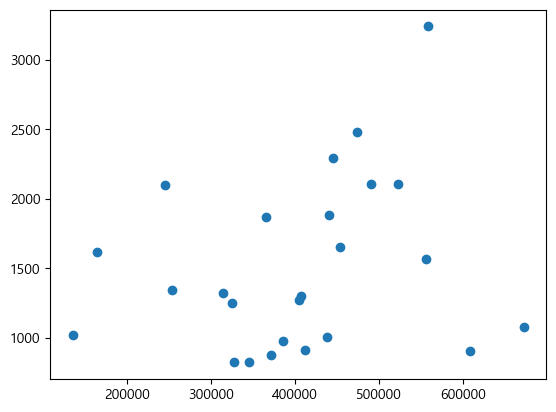

In [80]:
# plt.scatter(data_result["외국인비율"], data_result["소계"])
# plt.scatter(data_result["고령자비율"], data_result["소계"])
plt.scatter(data_result["인구수"], data_result["소계"])

### (2) 중간 Checkpoint

In [2]:
data_result.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")

NameError: name 'data_result' is not defined

----

In [4]:
data_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,오차,CCTV비율
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,1553.296412,0.580427
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,890.918761,0.524639
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,829.467513,0.149747
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,756.346747,0.854077
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,736.754790,0.515990


### (3) Visualization

<AxesSubplot:ylabel='구별'>

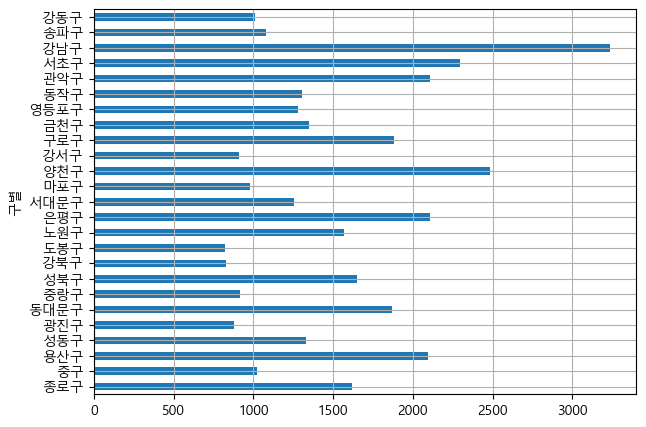

In [90]:
#### CCTV가 가징 많이 설치된 구

data_result["소계"].plot(kind="barh", figsize=(7, 5), grid=True)

In [3]:
#### 인구 대비 CCTV 개수 확인

data_result["CCTV비율"] = data_result["소계"]/data_result["인구수"]*100

In [4]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,오차,CCTV비율
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,1553.296412,0.580427
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,890.918761,0.524639
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,829.467513,0.149747
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,756.346747,0.854077
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,736.754790,0.515990


Text(0.3, 3, '다른 동네에 비해 인구수 대비 적게 설치된 것 같다')

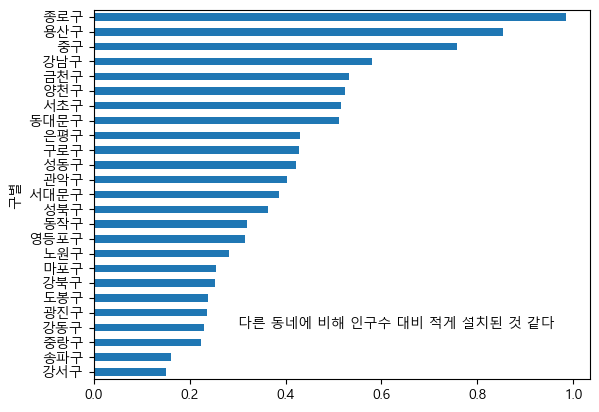

In [107]:
data_result["CCTV비율"].sort_values().plot(kind="barh")
plt.text(0.3, 3, "다른 동네에 비해 인구수 대비 적게 설치된 것 같다") 

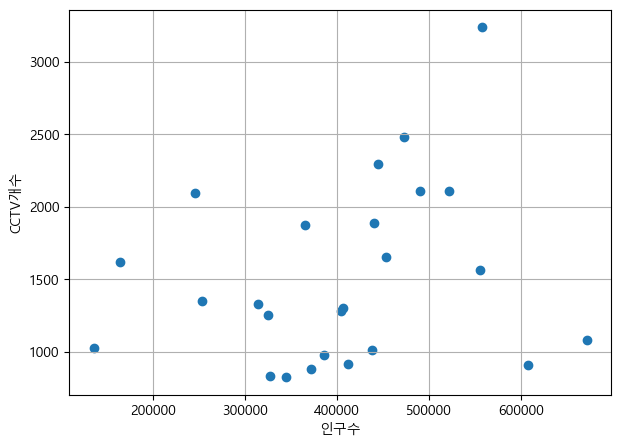

In [112]:
#### CCTV개수와 인구수가 서로 관계가 있는지 확인

plt.figure(figsize=(7, 5))
plt.scatter(data_result["인구수"], data_result["소계"])
plt.xlabel("인구수")
plt.ylabel("CCTV개수")
plt.grid()

✔ 회귀선 ✔
- 설명 : 데이터를 대표하는 값 확인, 평균선
- 예측

----

- np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False) : 방정식 찾아주는 함수
- np.poly1d(pf) : 방정식으로 포장

In [5]:
#### y = ax + b

pf = np.polyfit(data_result["인구수"], data_result["소계"], 1)
# pf[0]*350000 + pf[1]

p1 = np.poly1d(pf)
print(p1)

 
0.001104 x + 1069


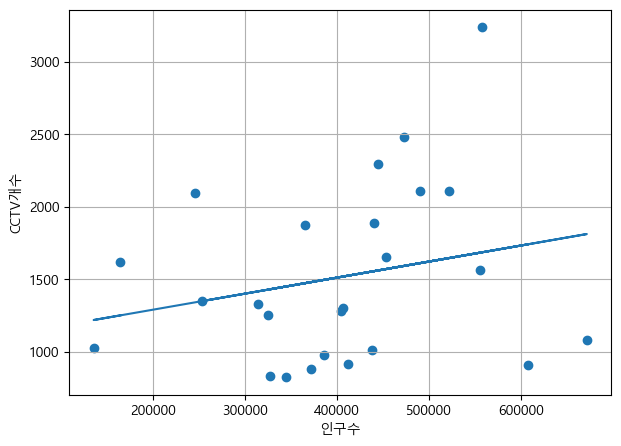

In [6]:
plt.figure(figsize=(7, 5))

plt.scatter(data_result["인구수"], data_result["소계"])
plt.plot(data_result["인구수"], p1(data_result["인구수"]))
# plt.plot(data_resilt["인구수"], pf[0]*data_result["인구수"]+pf[1])

plt.xlabel("인구수")
plt.ylabel("CCTV개수")
plt.grid()

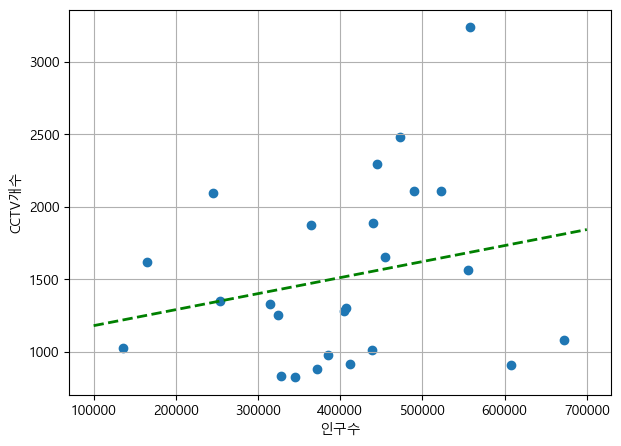

In [7]:
fx = np.linspace(100000, 700000, 100)  # 선 굴곡 없애기 위한 그래프판 생성

plt.figure(figsize=(7, 5))

plt.scatter(data_result["인구수"], data_result["소계"])
plt.plot(fx, pf[0]*fx+pf[1], lw=2, color="g", ls="dashed")

plt.xlabel("인구수")
plt.ylabel("CCTV개수")
plt.grid()

In [8]:
#### 각 데이터의 오차를 구해서 "오차"라는 파생변수 추가 ####

data_result["오차"] = np.abs(data_result["소계"] - p1(data_result["인구수"]))
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,오차
구별,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,368.866533
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,194.877278
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,756.346747
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,89.006188
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,601.085154


In [6]:
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근 증가율,오차,CCTV비율
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,1553.296412,0.580427
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,890.918761,0.524639
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,829.467513,0.149747
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,756.346747,0.854077
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,736.754790,0.515990


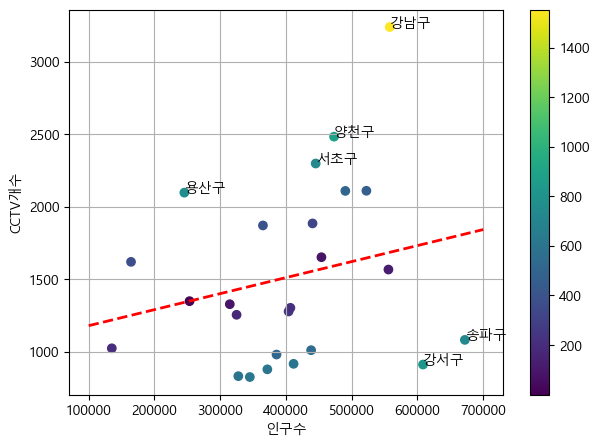

In [10]:
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(7, 5))

plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"])
plt.plot(fx, pf[0]*fx+pf[1], lw=2, color="r", ls="dashed")

plt.xlabel("인구수")
plt.ylabel("CCTV개수")
plt.grid()
plt.colorbar()

for i in range(6):  # 오차가 큰 지역 표시하기
    plt.text(df_sort["인구수"][i], df_sort["소계"][i], df_sort.index[i])

In [5]:
#### 지도를 이용하여 CCTV현황 파악 ####
# https://github.com/southkorea/southkorea-maps : 서울 위도, 경도 나눠둔 사이트

import folium

map = folium.Map(location=[37.5125585, 127.1025353], zoom_start=11)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
map.choropleth(geo_data=geo_path, data=data_result["소계"], key_on="feature.id",
              columns=[data_result.index, "소계"], fill_color="YlGn")

map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [7]:
#### 최종 결과물 저장 ####

df_sort.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")